In [36]:
import pandas as pd
from plotnine import *

In [37]:
df = pd.read_csv('data/전국도시공원표준데이터.csv', encoding='euc-kr')
df.shape

(13135, 18)

In [38]:
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,Unnamed: 17
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597,NaN,NaN,NaN,NaN,NaN,1995-12-27,강원도 양구군청,033-480-2927,2018-02-28,NaN
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437,NaN,NaN,NaN,NaN,NaN,2010-03-19,강원도 양구군청,033-480-2460,2018-02-28,NaN
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931,NaN,NaN,NaN,NaN,NaN,2010-10-01,강원도 양구군청,033-480-2576,2018-02-28,NaN


In [39]:
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소         5898
소재지지번주소          1204
위도                  6
경도                  6
공원면적               27
공원보유시설(운동시설)     9579
공원보유시설(유희시설)     8418
공원보유시설(편익시설)     9672
공원보유시설(교양시설)    12382
공원보유시설(기타시설)    11040
지정고시일            1939
관리기관명             783
전화번호              925
데이터기준일자             0
Unnamed: 17     13135
dtype: int64

In [40]:
df.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', 'Unnamed: 17'], inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 10 columns):
관리번호        13135 non-null object
공원명         13135 non-null object
공원구분        13135 non-null object
소재지도로명주소    7237 non-null object
소재지지번주소     11931 non-null object
위도          13129 non-null float64
경도          13129 non-null float64
공원면적        13108 non-null object
전화번호        12210 non-null object
데이터기준일자     13135 non-null object
dtypes: float64(2), object(8)
memory usage: 1.0+ MB


In [42]:
df.describe()

,위도,경도
count,13129.000000,13129.000000
mean,36.493476,127.555095
std,1.066760,0.870196
min,25.115601,125.432215
25%,35.568188,126.929027
50%,36.637676,127.141569
75%,37.460255,128.213060
max,38.350990,137.202661


In [43]:
# 시도와 구군 데이터 가져오기
df['시도'] = df['소재지도로명주소'].str.split(' ', expand=True)[0]
df['구군'] = df['소재지도로명주소'].str.split(' ', expand=True)[1]

In [44]:
df.shape

(13135, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 12 columns):
관리번호        13135 non-null object
공원명         13135 non-null object
공원구분        13135 non-null object
소재지도로명주소    7237 non-null object
소재지지번주소     11931 non-null object
위도          13129 non-null float64
경도          13129 non-null float64
공원면적        13108 non-null object
전화번호        12210 non-null object
데이터기준일자     13135 non-null object
시도          7237 non-null object
구군          7237 non-null object
dtypes: float64(2), object(10)
memory usage: 1.2+ MB


In [46]:
df.isnull().sum()

관리번호           0
공원명            0
공원구분           0
소재지도로명주소    5898
소재지지번주소     1204
위도             6
경도             6
공원면적          27
전화번호         925
데이터기준일자        0
시도          5898
구군          5898
dtype: int64

In [47]:
# plotnine에 면적 표현용 데이터 만들기
df['공원면적'] = df['공원면적'].str.replace(',', '').astype(float)
df['공원면적그래프용'] = df['공원면적'].apply(lambda x : x * 0.0001)
df['공원면적그래프용'].head()

0     0.1597
1     0.1498
2     0.1499
3     1.8437
4    17.8931
Name: 공원면적그래프용, dtype: float64

/Users/apple/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Users/apple/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to 

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

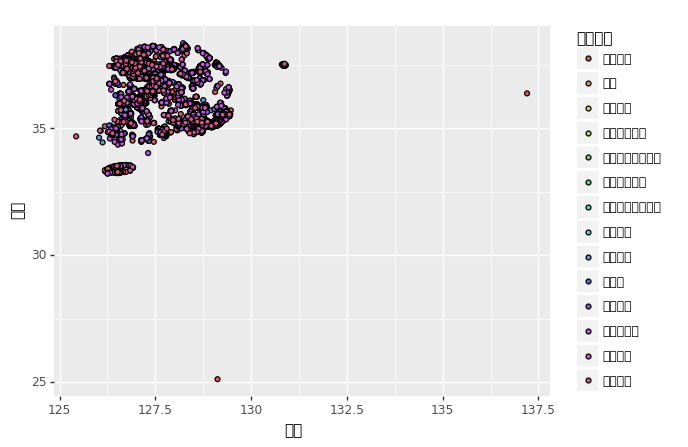

<ggplot: (-9223372029321812946)>

In [50]:
# 지도를 출력해 보니 특정 지역만 있습니다.
# 결측치인 nan 데이터 때문에 다른 데이터가 제대로 보이지 않습니다.
# nan 데이터를 제거하고 다시 그려봅니다.
(ggplot(df)
 + aes(x='경도', y='위도', fill='공원구분')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [51]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
# 그래프 표현시 위경도가 NaN값이면 오류가 나니 제거해 줍니다. 
df = df.loc[(df['위도'] > 32 ) 
            & (df['경도'] < 132) 
            & df['시도'].notnull()]
df.shape

(7237, 13)

In [53]:
# 특정지역의 일부 공원만 보기
park_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
gg_sample = gg.loc[gg['공원구분'].str.match(park_type)]

NameError: name 'gg' is not defined